In [84]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [23]:
running_in_drive = False

images_path = '../presentation/Azin_images'
models_path = '../code/Azin_models'
data_path = '../data'


if running_in_drive:
    images_path = '/content/drive/MyDrive/GA/images'
    models_path = '/content/drive/MyDrive/GA/models'
    data_path = '/content/drive/MyDrive/GA/data'

In [2]:
ls ../code/Azin_models

grid_CountVectorizer_MultinomialNB.pkl*
grid_TfidfVectorizer_LogisticRegression.pkl*
mdl_CountVectorizer_MultinomialNB.pkl*
mdl_TfidfVectorizer_LogisticRegression.pkl*


In [82]:
def read_model(transformer, estimator, verbose=False):
    """
    Read the picked models.
    mdl = read_model('CountVectorizer', 'MultinomialNB')
    """
    name = f'grid_{transformer}_{estimator}.pkl'
    path = f'{models_path}/{name}'
    if verbose:
        print(f'Reading {path}:')
    with open(path, 'rb') as pickle_in:
        mdl = pickle.load(pickle_in)
    return mdl


def read_data():
    """
    Reads the preprocessed data
    """
    
    path = f'{data_path}/processed_data.csv'
    df = pd.read_csv(path)
    df = df[['text', 'sentiment', 'Content Length', 'Content Word Count', 'emojis', 'num_comments','subreddit', 'label']]
    df.columns = df.columns.str.title()
    return df

def predict_label(mdl, text_input):
    labels = {0: 'Anxiety', 1: 'No Anxiety'}
    out = mdl.predict(text_input)
    pred = pd.DataFrame(out, columns=['prediction'])
    pred['text'] = text_input
    pred['prediction'] = pred['prediction'].map({0: 'Anxiety', 1: 'No Anxiety'})
    return pred[['text', 'prediction']]
    

In [58]:
mnb_mdl = read_model('CountVectorizer', 'MultinomialNB')
lr_mdl = read_model('TfidfVectorizer', 'LogisticRegression')

In [61]:
text_input = ["I am sad", "writing", "I am anxious"]

print('\nMultinomialNB')
display(predict_label(mnb_mdl, text_input))
print('\nLogisticRegression')
display(predict_label(lr_mdl, text_input))


MultinomialNB


,text,prediction
0,I am sad,Anxiety
1,writing,No Anxiety
2,I am anxious,Anxiety



LogisticRegression


,text,prediction
0,I am sad,No Anxiety
1,writing,No Anxiety
2,I am anxious,Anxiety


In [83]:
df = read_data()
df.head()

,Text,Sentiment,Content Length,Content Word Count,Emojis,Num_Comments,Subreddit,Label
0,dae question scared dying scared die anxiety c...,-0.9074,0,0,NaN,9,Anxiety,0
1,health tight throat tight throat gagging feeli...,-0.0516,51,10,NaN,1,Anxiety,0
2,advice needed anxiety overriding intuition. do...,0.8996,673,128,NaN,3,Anxiety,0
3,advice needed anxiety overriding intuition. do...,0.8996,673,128,NaN,7,Anxiety,0
4,advice needed hey friends! need advice anxiety...,-0.2338,405,82,NaN,1,Anxiety,0


In [79]:
df.groupby('subreddit')['num_comments'].mean()

subreddit
Anxiety       3.489667
No Anxiety    9.577333
Name: num_comments, dtype: float64

In [81]:
df.groupby('subreddit')['sentiment'].agg(['max', 'mean', 'min'])

,max,mean,min
subreddit,,,
Anxiety,3.1892,-0.282417,-2.5185
No Anxiety,3.0775,0.267053,-1.3624


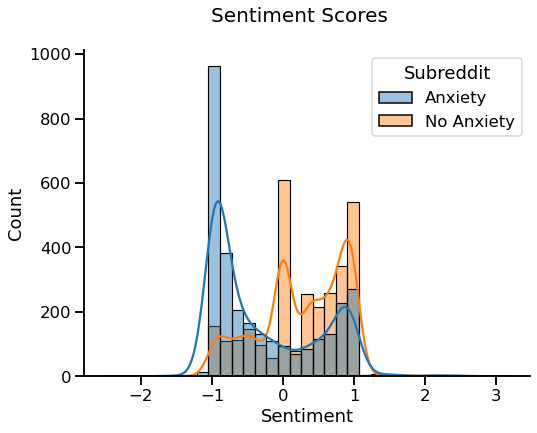

In [93]:
plt.figure(figsize=(8,6))
g = sns.histplot(df, x='Sentiment', hue='Subreddit', kde=True, legend=True, alpha=.45);
sns.despine(top=True);
plt.suptitle('Sentiment Scores', fontsize=20);
plt.savefig(f'{images_path}/sentiment_dist.png', bbox_inches='tight', dpi=300)

In [107]:
df[df['Emojis'].str.len()>0]

,Text,Sentiment,Content Length,Content Word Count,Emojis,Num_Comments,Subreddit,Label
5,therapy oh boy physically sick thinking shit t...,0.7579,89,15,🤢 🤪 ✌🏼,0,Anxiety,0
54,doe anxiety affect you? struggle daily anxiety...,2.1985,1587,292,✌🏼 ❤,1,Anxiety,0
66,work/school job make feel anxious depressed jo...,-1.1355,1333,264,😔,0,Anxiety,0
138,car ride anxiety attack? riding passenger feel...,0.5377,153,26,😞,1,Anxiety,0
146,"venting comedy movie it's bad, can't make issu...",-1.0407,584,112,😫,6,Anxiety,0
...,...,...,...,...,...,...,...,...
5580,evil redditors write short story revenge/moral...,-0.3348,1331,253,😊,1,No Anxiety,1
5670,super proud progress!!! friend got interested ...,1.6459,424,85,☺,5,No Anxiety,1
5747,hiii need help hello wondering help descriptiv...,2.0332,222,44,😊 😁,3,No Anxiety,1
5883,new book blog ☺ ️ 📚,0.9930,0,0,☺ 📚,2,No Anxiety,1


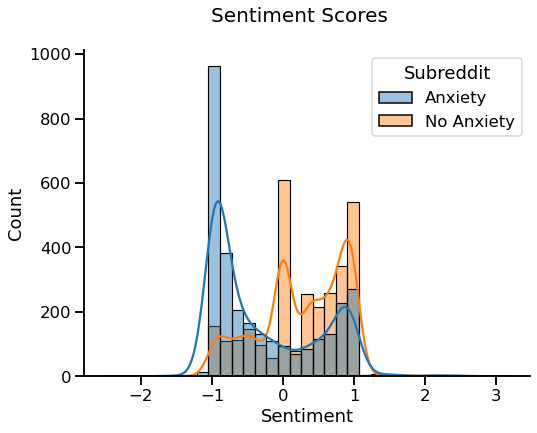

In [94]:
plt.figure(figsize=(8,6))
df_with_emojis = df[df['Emojis'].str.len()>0]
g = sns.histplot(df_with_emojis, x='Sentiment', hue='Subreddit', kde=True, legend=True, alpha=.45);
sns.despine(top=True);
plt.suptitle('Sentiment Scores', fontsize=20);

#plt.savefig(f'{images_path}/sentiment_dist_emoji.png', bbox_inches='tight', dpi=300)